### deposit_1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
base = pd.read_csv("../Datas/csv_files/train/train_base.csv")
data = pd.read_csv("../Datas/csv_files/train/depth 1/train_deposit_1.csv")

In [3]:
base

,case_id,date_decision,MONTH,WEEK_NUM,target
0,0,2019-01-03,201901,0,0
1,1,2019-01-03,201901,0,0
2,2,2019-01-04,201901,0,0
3,3,2019-01-03,201901,0,0
4,4,2019-01-04,201901,0,1
...,...,...,...,...,...
1526654,2703450,2020-10-05,202010,91,0
1526655,2703451,2020-10-05,202010,91,0
1526656,2703452,2020-10-05,202010,91,0
1526657,2703453,2020-10-05,202010,91,0


In [4]:
data

,case_id,amount_416A,contractenddate_991D,num_group1,openingdate_313D
0,225,0.00000,NaN,0,2016-08-16
1,331,260.37400,2018-03-18,0,2015-03-19
2,358,0.00000,NaN,0,2014-09-02
3,390,211748.53000,2017-07-22,0,2014-07-23
4,390,223.68001,NaN,2,2016-06-08
...,...,...,...,...,...
145081,2703430,22918.00600,NaN,8,2016-11-26
145082,2703430,0.00000,NaN,2,2014-02-14
145083,2703439,219.98401,NaN,0,2016-11-25
145084,2703453,44916.64500,2018-05-28,1,2015-05-29


In [5]:
# object → datetime64
data["openingdate_313D"] = pd.to_datetime(data["openingdate_313D"])
data["contractenddate_991D"] = pd.to_datetime(data["contractenddate_991D"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145086 entries, 0 to 145085
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   case_id               145086 non-null  int64         
 1   amount_416A           145086 non-null  float64       
 2   contractenddate_991D  65404 non-null   datetime64[ns]
 3   num_group1            145086 non-null  int64         
 4   openingdate_313D      145086 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2)
memory usage: 5.5 MB


#### 01\. Exploratory Data Analysis<br>

&nbsp;&nbsp;1\) Column별 내용<span style="font-size:16px;">(추정)</span><br>
&nbsp;(1) <b>amount_416A</b>: 계좌 잔액<span style="font-size:16px">(Deposit amount)</span><br>
&nbsp;(2) <b>contractenddate_991D</b>: 대출 상환 만기일<span style="font-size:16px">(End date of deposit contract)</span><br>
&nbsp;(3) <b>openingdate_313D</b>: 대출 계좌 개설일<span style="font-size:16px">(Deposit account opening date)</span>

&nbsp;(1) `num_group1`의 범위

In [6]:
data["num_group1"].value_counts().index.sort_values()  # 0~64

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64],
           dtype='int64')

&nbsp;(2) `num_group1`이 0인 값과 0이 아닌 값 비교

In [7]:
from sklearn.utils import resample
from scipy.stats import ks_2samp

ng_0 = data[data["num_group1"] == 0]
ng_non0 = data[data["num_group1"] != 0]
upsampled_ng_non0 = pd.DataFrame(resample(ng_non0, replace=True, n_samples=len(ng_0), random_state=0xC0FFEE))  # 분포 비교를 위해 업샘플링

# 두 데이터셋의 분포 비교
ks_stat, p_val = ks_2samp(ng_non0["amount_416A"], upsampled_ng_non0["amount_416A"])

print("KS statistic:", ks_stat)
print("P-value:", p_val)  # p-value가 0.05 이상이므로 H0 기각 실패 → 두 데이터의 분포는 동일하다

KS statistic: 0.0016244697845820832
P-value: 0.9999990130394858


In [8]:
ng_0

,case_id,amount_416A,contractenddate_991D,num_group1,openingdate_313D
0,225,0.00000,NaT,0,2016-08-16
1,331,260.37400,2018-03-18,0,2015-03-19
2,358,0.00000,NaT,0,2014-09-02
3,390,211748.53000,2017-07-22,0,2014-07-23
9,445,0.00000,NaT,0,2015-04-27
...,...,...,...,...,...
145072,2703426,1181.73610,2018-11-25,0,2015-11-26
145073,2703427,250.76399,2018-06-25,0,2015-06-26
145079,2703430,0.00000,NaT,0,2015-02-13
145083,2703439,219.98401,NaT,0,2016-11-25


In [9]:
ng_non0

,case_id,amount_416A,contractenddate_991D,num_group1,openingdate_313D
4,390,223.68001,NaT,2,2016-06-08
5,390,203.60200,2017-09-30,1,2015-10-01
6,445,23735.93800,NaT,4,2016-07-19
7,445,0.00000,2017-07-31,1,2015-08-01
8,445,0.00000,NaT,3,2016-02-22
...,...,...,...,...,...
145078,2703430,0.00000,NaT,3,2015-03-19
145080,2703430,0.00000,NaT,5,2015-08-25
145081,2703430,22918.00600,NaT,8,2016-11-26
145082,2703430,0.00000,NaT,2,2014-02-14


- amount_416A
    - 대출 신청자들의 직불카드 계좌 잔액이 더 적음
    - num_group1에 따른 결측치 비율
        - 결측치 없음

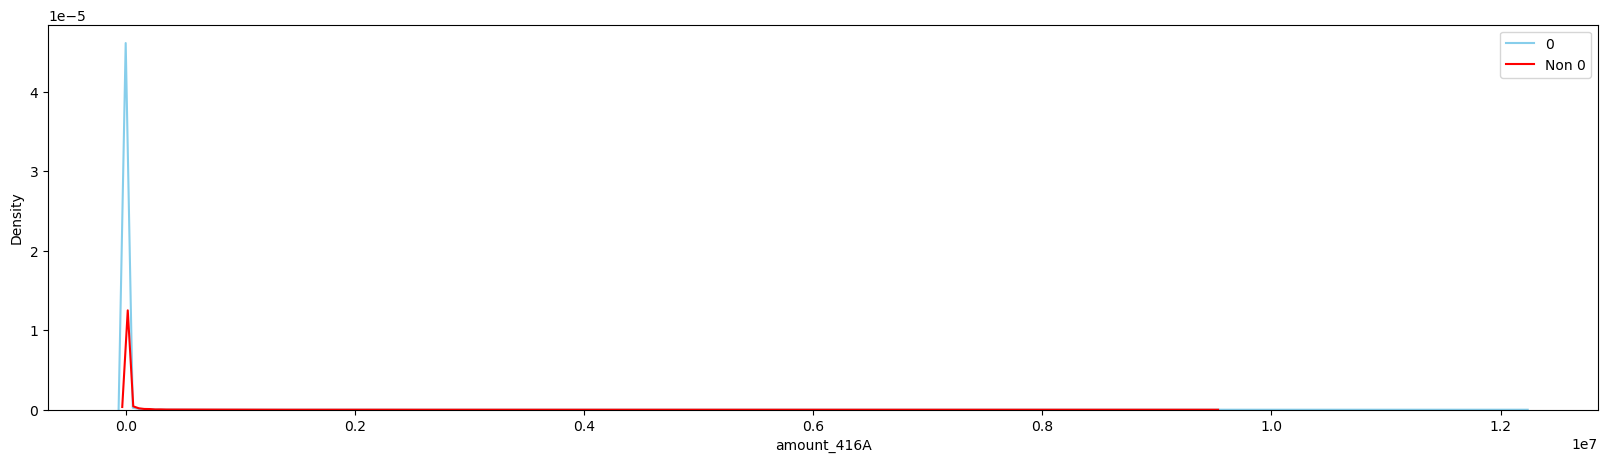

In [10]:
# 분포 비교 (+ Upsampling)
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(1, 1, 1)

sns.kdeplot(data=ng_0["amount_416A"], ax=ax, label="0", color='skyblue')
sns.kdeplot(data=upsampled_ng_non0["amount_416A"], ax=ax, label="Non 0", color='red')

plt.legend()
plt.show()

In [11]:
# num_group1에 따른 결측치 처리
total_count = len(ng_0)
null_count = len(ng_0[~ng_0["amount_416A"].notna()])

print("Null Ratio when num_group1 is 0: {:.2f}%".format((null_count / total_count)*100))

total_count = len(ng_non0)
null_count = len(ng_non0[~ng_non0["amount_416A"].notna()])

print("Null Ratio when num_group1 is not 0: {:.2f}%".format((null_count / total_count)*100))

Null Ratio when num_group1 is 0: 0.00%
Null Ratio when num_group1 is not 0: 0.00%


- contractenddate_991D
    - 미신청자들과 달리 대출 신청자들은 2017, 2018년에 거래 만료일이 집중되어 있음
    - num_group1에 따른 결측치 비율
        - 0일 때 약 49.46%
        - 0이 아닐 때 약 69.28%

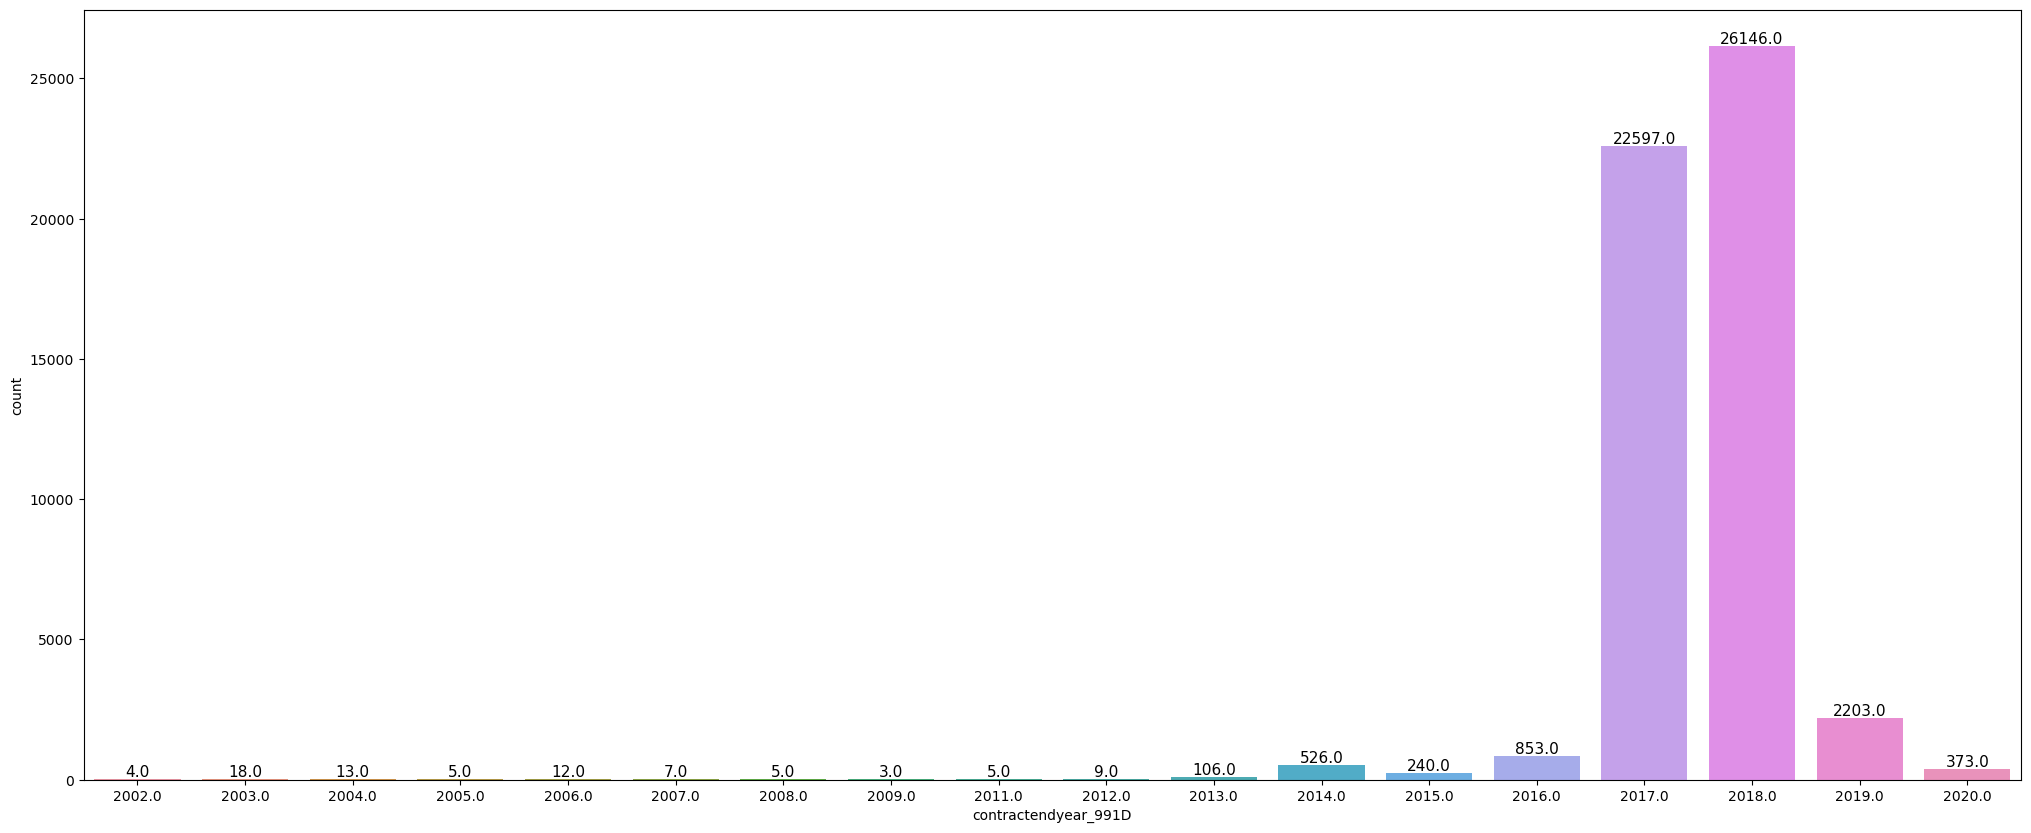

,case_id,amount_416A,contractenddate_991D,num_group1,openingdate_313D
0,225,0.00000,NaT,0,2016-08-16
1,331,260.37400,2018-03-18,0,2015-03-19
2,358,0.00000,NaT,0,2014-09-02
3,390,211748.53000,2017-07-22,0,2014-07-23
9,445,0.00000,NaT,0,2015-04-27
...,...,...,...,...,...
145072,2703426,1181.73610,2018-11-25,0,2015-11-26
145073,2703427,250.76399,2018-06-25,0,2015-06-26
145079,2703430,0.00000,NaT,0,2015-02-13
145083,2703439,219.98401,NaT,0,2016-11-25


In [12]:
# num_group1 = 0
ng_0["contractendyear_991D"] = ng_0["contractenddate_991D"].dt.year  # year 열 추가

plt.figure(figsize=(25, 10))
ax = sns.countplot(ng_0, x="contractendyear_991D")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), 
                textcoords='offset points')
    
plt.show()

ng_0.drop(columns=["contractendyear_991D"])

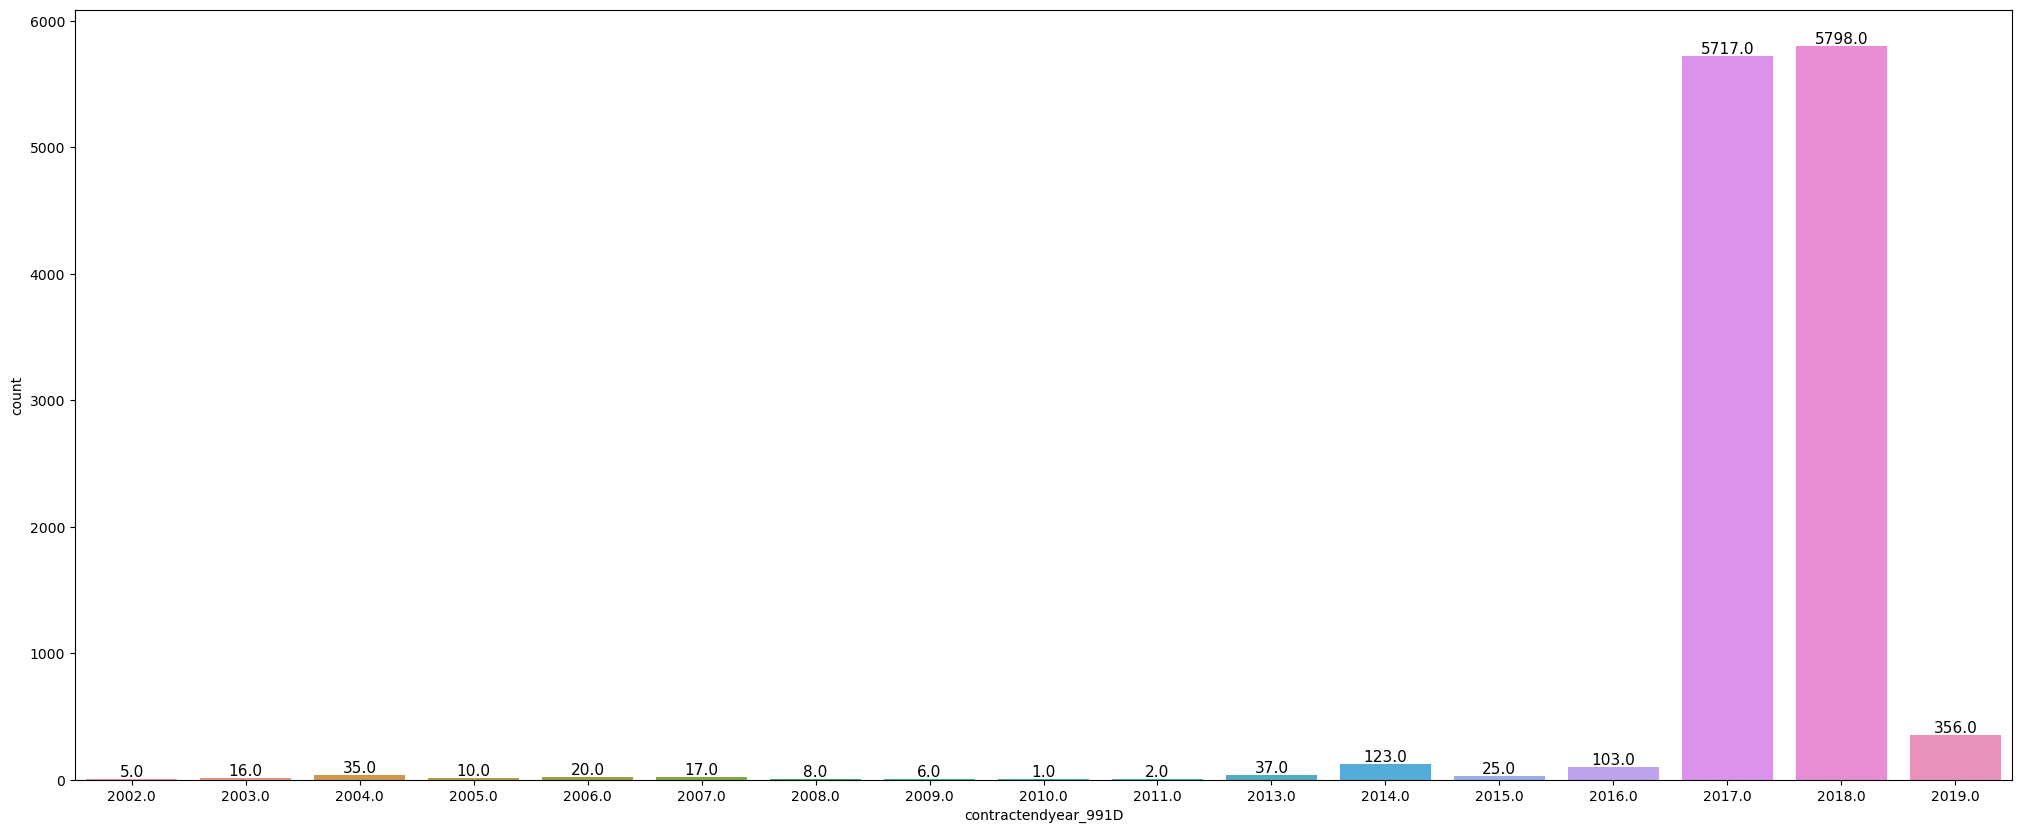

,case_id,amount_416A,contractenddate_991D,num_group1,openingdate_313D
4,390,223.68001,NaT,2,2016-06-08
5,390,203.60200,2017-09-30,1,2015-10-01
6,445,23735.93800,NaT,4,2016-07-19
7,445,0.00000,2017-07-31,1,2015-08-01
8,445,0.00000,NaT,3,2016-02-22
...,...,...,...,...,...
145078,2703430,0.00000,NaT,3,2015-03-19
145080,2703430,0.00000,NaT,5,2015-08-25
145081,2703430,22918.00600,NaT,8,2016-11-26
145082,2703430,0.00000,NaT,2,2014-02-14


In [13]:
# num_group1 != 0
ng_non0["contractendyear_991D"] = ng_non0["contractenddate_991D"].dt.year

plt.figure(figsize=(25, 10))
ax = sns.countplot(ng_non0, x="contractendyear_991D")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), 
                textcoords='offset points')
    
plt.show()

ng_non0.drop(columns=["contractendyear_991D"])

In [14]:
# num_group1에 따른 결측치 처리
total_count = len(ng_0)
null_count = len(ng_0[~ng_0["contractenddate_991D"].notna()])

print("Null Ratio when num_group1 is 0: {:.2f}%".format((null_count / total_count)*100))

total_count = len(ng_non0)
null_count = len(ng_non0[~ng_non0["contractenddate_991D"].notna()])

print("Null Ratio when num_group1 is not 0: {:.2f}%".format((null_count / total_count)*100))

Null Ratio when num_group1 is 0: 49.46%
Null Ratio when num_group1 is not 0: 69.28%


- openingdate_313D
    - 미신청자들과 달리 대출 신청자들은 2014년에 가장 계좌 개설 빈도가 높고 점차 줄어듦
    - num_group1에 따른 결측치 비율
        - 결측치 없음

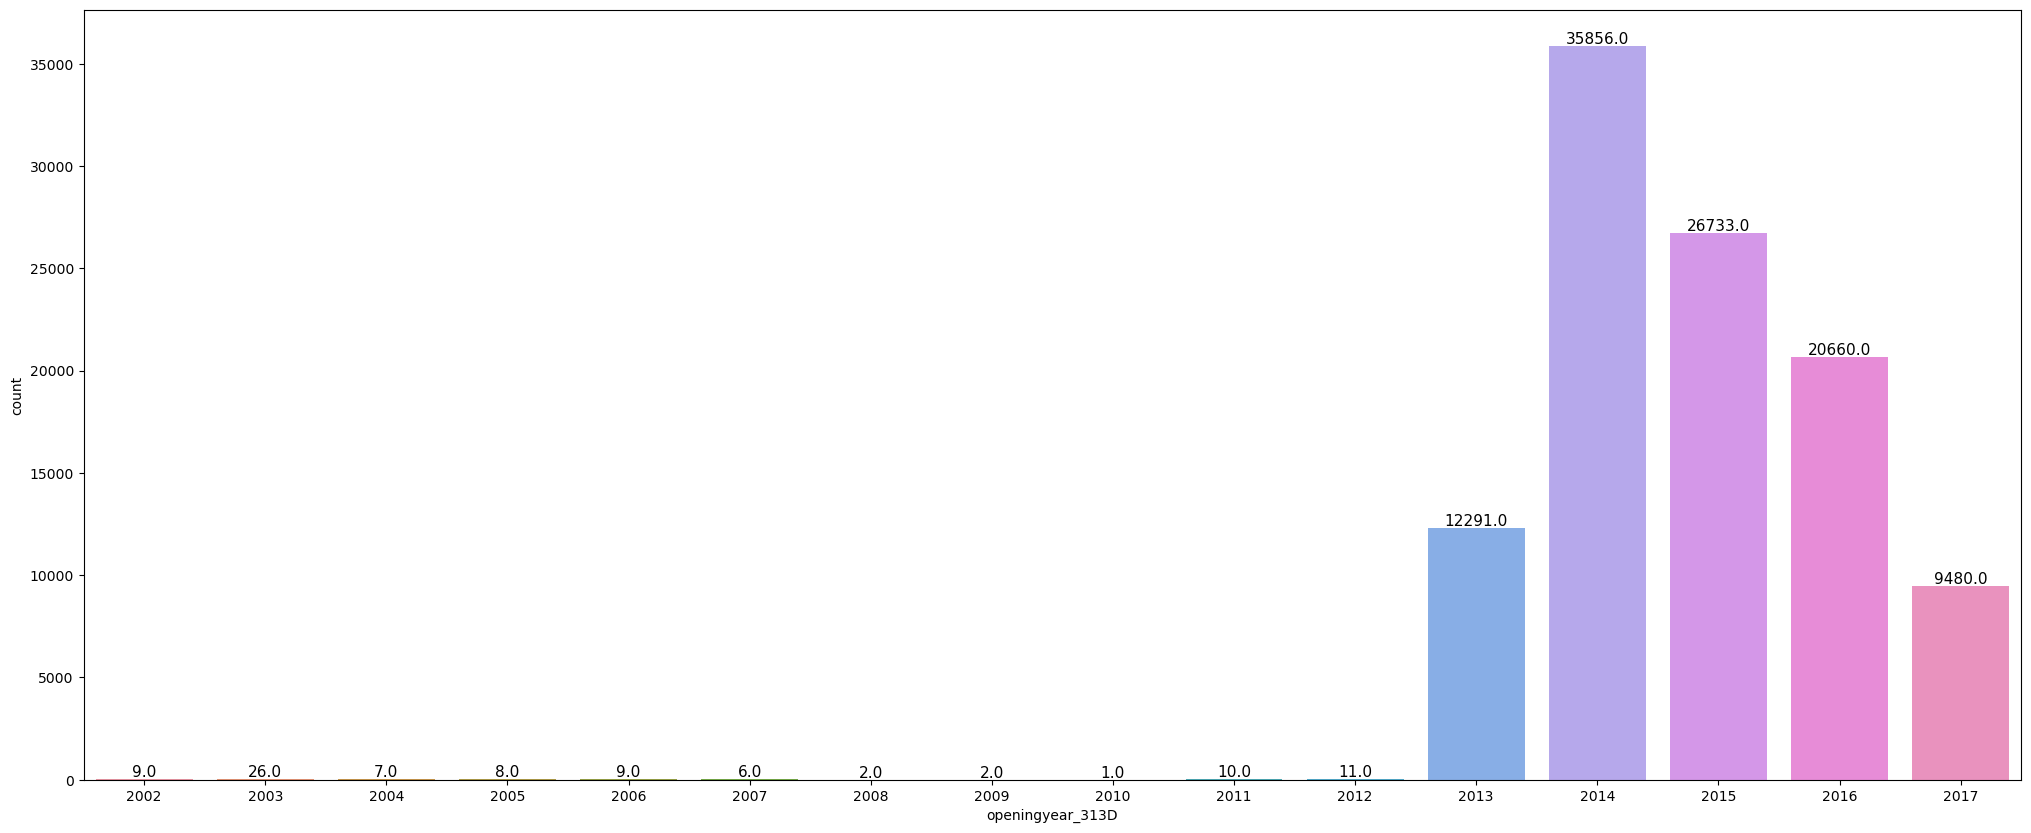

,case_id,amount_416A,contractenddate_991D,num_group1,openingdate_313D,contractendyear_991D
0,225,0.00000,NaT,0,2016-08-16,NaN
1,331,260.37400,2018-03-18,0,2015-03-19,2018.0
2,358,0.00000,NaT,0,2014-09-02,NaN
3,390,211748.53000,2017-07-22,0,2014-07-23,2017.0
9,445,0.00000,NaT,0,2015-04-27,NaN
...,...,...,...,...,...,...
145072,2703426,1181.73610,2018-11-25,0,2015-11-26,2018.0
145073,2703427,250.76399,2018-06-25,0,2015-06-26,2018.0
145079,2703430,0.00000,NaT,0,2015-02-13,NaN
145083,2703439,219.98401,NaT,0,2016-11-25,NaN


In [15]:
# num_group1 = 0
ng_0["openingyear_313D"] = ng_0["openingdate_313D"].dt.year  # year 열 추가

plt.figure(figsize=(25, 10))
ax = sns.countplot(ng_0, x="openingyear_313D")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), 
                textcoords='offset points')
    
plt.show()

ng_0.drop(columns=["openingyear_313D"])

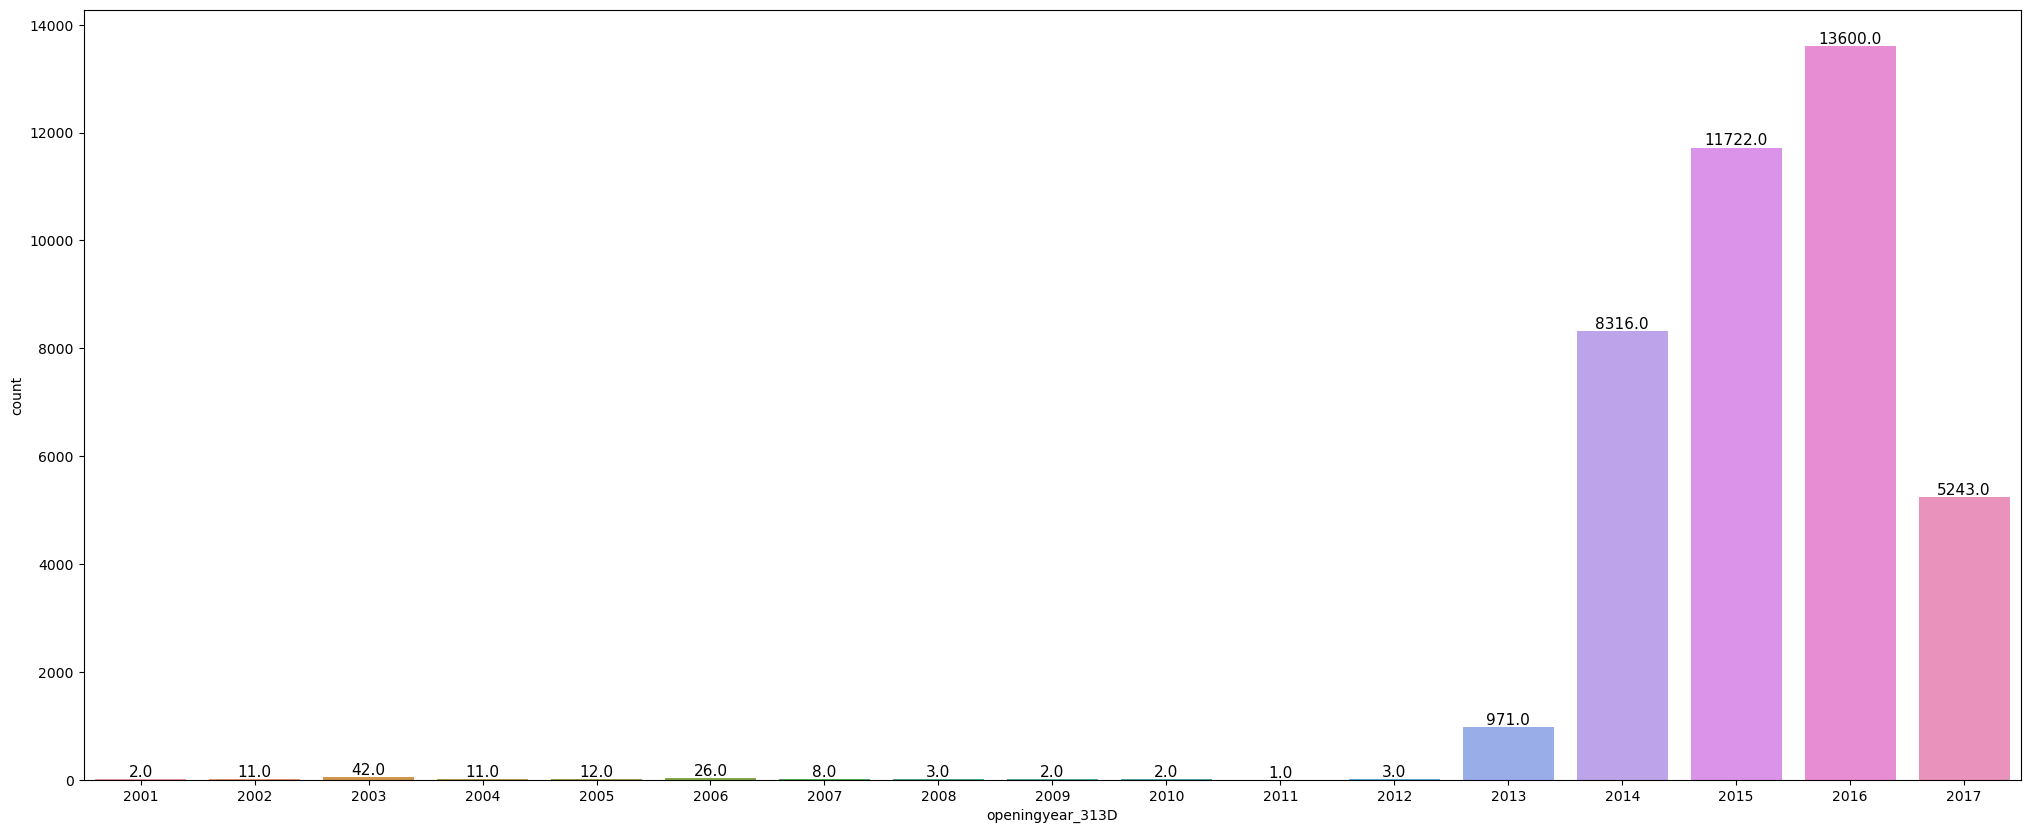

,case_id,amount_416A,contractenddate_991D,num_group1,openingdate_313D,contractendyear_991D
4,390,223.68001,NaT,2,2016-06-08,NaN
5,390,203.60200,2017-09-30,1,2015-10-01,2017.0
6,445,23735.93800,NaT,4,2016-07-19,NaN
7,445,0.00000,2017-07-31,1,2015-08-01,2017.0
8,445,0.00000,NaT,3,2016-02-22,NaN
...,...,...,...,...,...,...
145078,2703430,0.00000,NaT,3,2015-03-19,NaN
145080,2703430,0.00000,NaT,5,2015-08-25,NaN
145081,2703430,22918.00600,NaT,8,2016-11-26,NaN
145082,2703430,0.00000,NaT,2,2014-02-14,NaN


In [16]:
# num_group1 != 0
ng_non0["openingyear_313D"] = ng_non0["openingdate_313D"].dt.year

plt.figure(figsize=(25, 10))
ax = sns.countplot(ng_non0, x="openingyear_313D")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), 
                textcoords='offset points')
    
plt.show()

ng_non0.drop(columns=["openingyear_313D"])

In [17]:
# num_group1에 따른 결측치 처리
total_count = len(ng_0)
null_count = len(ng_0[~ng_0["openingdate_313D"].notna()])

print("Null Ratio when num_group1 is 0: {:.2f}%".format((null_count / total_count)*100))

total_count = len(ng_non0)
null_count = len(ng_non0[~ng_non0["openingdate_313D"].notna()])

print("Null Ratio when num_group1 is not 0: {:.2f}%".format((null_count / total_count)*100))

Null Ratio when num_group1 is 0: 0.00%
Null Ratio when num_group1 is not 0: 0.00%


##### &nbsp;&nbsp;4\) case_id가 unique한가?: <b>No</b>, 약 1.38배 많음

In [18]:
print(data["case_id"].count()/data["case_id"].nunique())

1.380312241344864


##### &nbsp;&nbsp;5\) Column별 분석

&nbsp;(1) <b>amount_416A</b><br>
&nbsp;&nbsp;&nbsp;- null<span style="font-size:16px">(비율)</span>: 1,421,548개<span style="font-size:16px">(약 90.74%)</span><br>
&nbsp;&nbsp;&nbsp;- 0<span style="font-size:16px">(비율)</span>: 141,956개<span style="font-size:16px">(약 9.06%)</span><br>
&nbsp;&nbsp;&nbsp;- 1<span style="font-size:16px">(비율)</span>: 3,130개<span style="font-size:16px">(약 0.20%)</span><br>
&nbsp;&nbsp;&nbsp;- 최솟값/최댓값: -40,000.0/12,213,286.0

In [19]:
new_data = pd.merge(base[["case_id", "target"]], data, on="case_id", how="left")

null_count = new_data["amount_416A"].isnull().sum()
total_count = len(new_data["amount_416A"])
null_ratio = null_count / total_count

print("전체 갯수: {:,}개".format(total_count))
print("널 값 갯수: {:,}개".format(null_count))
print("널 값 비율: {:.2f}%".format(100*null_ratio))

전체 갯수: 1,566,634개
널 값 갯수: 1,421,548개
널 값 비율: 90.74%


In [20]:
new_data_0 = new_data[new_data["target"] == 0]
count_0 = len(new_data_0[new_data_0["amount_416A"].notnull()])
ratio_0 = count_0 / total_count

print("target=0일 때 갯수: {:,}개".format(count_0))
print("비율: {:.2f}%".format(100*ratio_0))

target=0일 때 갯수: 141,956개
비율: 9.06%


In [21]:
new_data_1 = new_data[new_data["target"] == 1]
count_1 = len(new_data_1[new_data_1["amount_416A"].notnull()])
ratio_1 = count_1 / total_count

print("target=1일 때 갯수: {:,}개".format(count_1))
print("비율: {:.2f}%".format(100*ratio_1))

target=1일 때 갯수: 3,130개
비율: 0.20%


In [22]:
max_of_amount_416A = new_data["amount_416A"].max()
min_of_amount_416A = new_data["amount_416A"].min()

print("최솟값/최댓값: {:,}/{:,}".format(min_of_amount_416A, max_of_amount_416A))

최솟값/최댓값: -40,000.0/12,213,286.0


&nbsp;(2) <b>contractenddate_991D</b><br>
&nbsp;&nbsp;&nbsp;- null<span style="font-size:16px">(비율)</span>: 1,501,230개<span style="font-size:16px">(약 95.83%)</span><br>
&nbsp;&nbsp;&nbsp;- 0<span style="font-size:16px">(비율)</span>: 63,988개<span style="font-size:16px">(약 4.08%)</span><br>
&nbsp;&nbsp;&nbsp;- 1<span style="font-size:16px">(비율)</span>: 1,416개<span style="font-size:16px">(약 0.09%)</span><br>

In [23]:
new_data = pd.merge(base[["case_id", "target"]], data, on="case_id", how="left")

null_count = new_data["contractenddate_991D"].isnull().sum()
total_count = len(new_data["contractenddate_991D"])
null_ratio = null_count / total_count

print("전체 갯수: {:,}개".format(total_count))
print("널 값 갯수: {:,}개".format(null_count))
print("널 값 비율: {:.2f}%".format(100*null_ratio))

전체 갯수: 1,566,634개
널 값 갯수: 1,501,230개
널 값 비율: 95.83%


In [24]:
new_data_0 = new_data[new_data["target"] == 0]
count_0 = len(new_data_0[new_data_0["contractenddate_991D"].notnull()])
ratio_0 = count_0 / total_count

print("target=0일 때 갯수: {:,}개".format(count_0))
print("비율: {:.2f}%".format(100*ratio_0))

target=0일 때 갯수: 63,988개
비율: 4.08%


In [25]:
new_data_1 = new_data[new_data["target"] == 1]
count_1 = len(new_data_1[new_data_1["contractenddate_991D"].notnull()])
ratio_1 = count_1 / total_count

print("target=1일 때 갯수: {:,}개".format(count_1))
print("비율: {:.2f}%".format(100*ratio_1))

target=1일 때 갯수: 1,416개
비율: 0.09%


&nbsp;(3) <b>openingdate_313D</b><br>
&nbsp;&nbsp;&nbsp;- null<span style="font-size:16px">(비율)</span>: 1,421,548개<span style="font-size:16px">(약 90.74%)</span><br>
&nbsp;&nbsp;&nbsp;- 0<span style="font-size:16px">(비율)</span>: 141,956개<span style="font-size:16px">(약 9.06%)</span><br>
&nbsp;&nbsp;&nbsp;- 1<span style="font-size:16px">(비율)</span>: 3,130개<span style="font-size:16px">(약 0.20%)</span><br>

In [26]:
new_data = pd.merge(base[["case_id", "target"]], data, on="case_id", how="left")

null_count = new_data["openingdate_313D"].isnull().sum()
total_count = len(new_data["openingdate_313D"])
null_ratio = null_count / total_count

print("전체 갯수: {:,}개".format(total_count))
print("널 값 갯수: {:,}개".format(null_count))
print("널 값 비율: {:.2f}%".format(100*null_ratio))

전체 갯수: 1,566,634개
널 값 갯수: 1,421,548개
널 값 비율: 90.74%


In [27]:
new_data_0 = new_data[new_data["target"] == 0]
count_0 = len(new_data_0[new_data_0["openingdate_313D"].notnull()])
ratio_0 = count_0 / total_count

print("target=0일 때 갯수: {:,}개".format(count_0))
print("비율: {:.2f}%".format(100*ratio_0))

target=0일 때 갯수: 141,956개
비율: 9.06%


In [28]:
new_data_1 = new_data[new_data["target"] == 1]
count_1 = len(new_data_1[new_data_1["openingdate_313D"].notnull()])
ratio_1 = count_1 / total_count

print("target=1일 때 갯수: {:,}개".format(count_1))
print("비율: {:.2f}%".format(100*ratio_1))

target=1일 때 갯수: 3,130개
비율: 0.20%


##### &nbsp;&nbsp;5\) Imputation

&nbsp;(1) <b>amount_416A</b><br>
- 계좌 잔액<span style="font-size:16px">(Deposit amount)</span><br>
- 채무이행자들과 달리 채무불이행자들의 평균 잔액이 0인 경우가 더 많음
- 결측치 처리<br>
① -40,000~100,000에 속하는 데이터는 1, 40,000 초과 데이터는 0을 표시하는 컬럼 추가
  - 근거1: 아래 그래프에서 높은 비중을 차지하는 해당 범위 데이터가 같은 비율의 데이터 중 가장 채무불이행자를 잘 예측하리라는 판단
    - 가설 기각... 

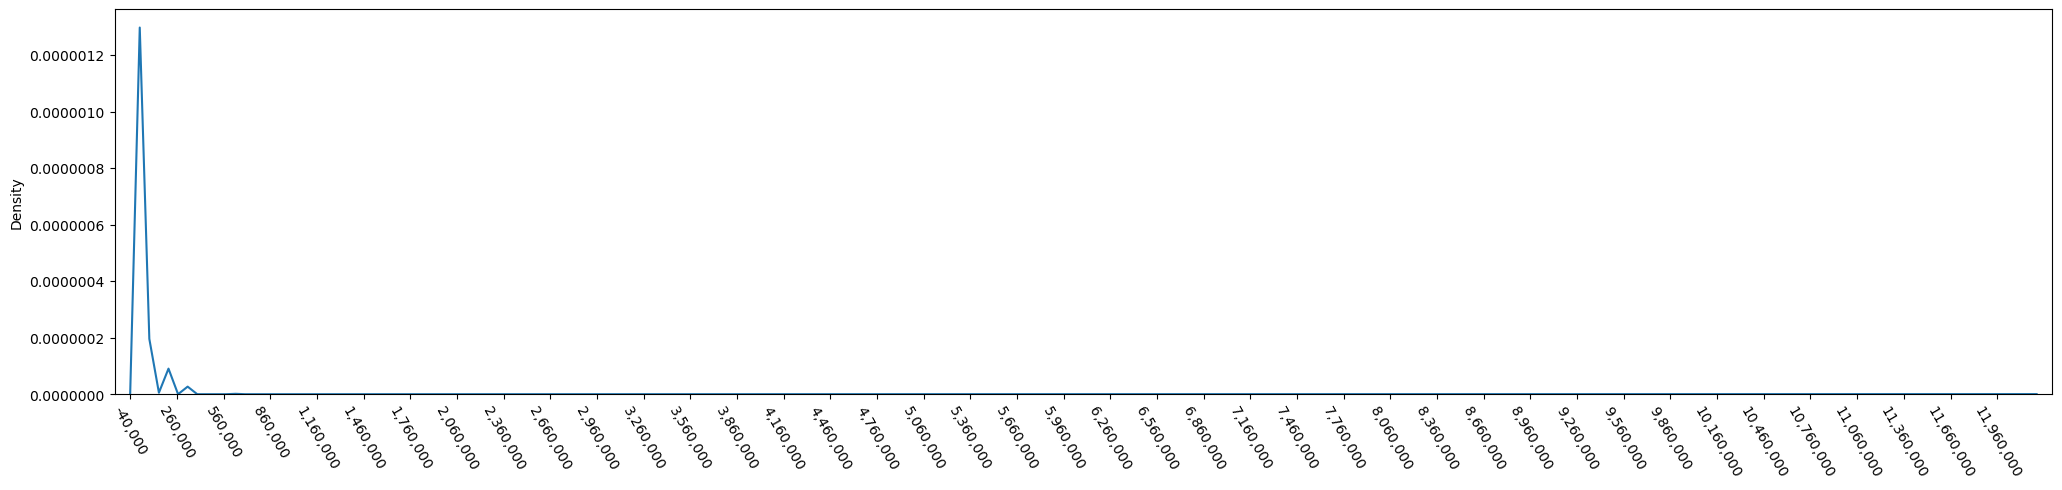

In [29]:
# 전체 분포 확인
plt.figure(figsize=(25, 5))
ax = plt.gca()

# 과학적 표기법 제거 (e.g. 1e7)
plt.ticklabel_format(axis='x', useOffset=False, style='plain')
plt.ticklabel_format(axis='y', useOffset=False, style='plain')

sns.kdeplot(data=new_data["amount_416A"].values, bw_adjust=0.01)

plt.xlim(new_data["amount_416A"].min()-100000, new_data["amount_416A"].max()+100000)
plt.xticks(ticks=range(int(new_data["amount_416A"].min()), int(new_data["amount_416A"].max()+1), 300000), rotation=-60)
current_values = plt.gca().get_xticks()
ax.set_xticklabels(['{:,}'.format(x) for x in current_values])

plt.show()

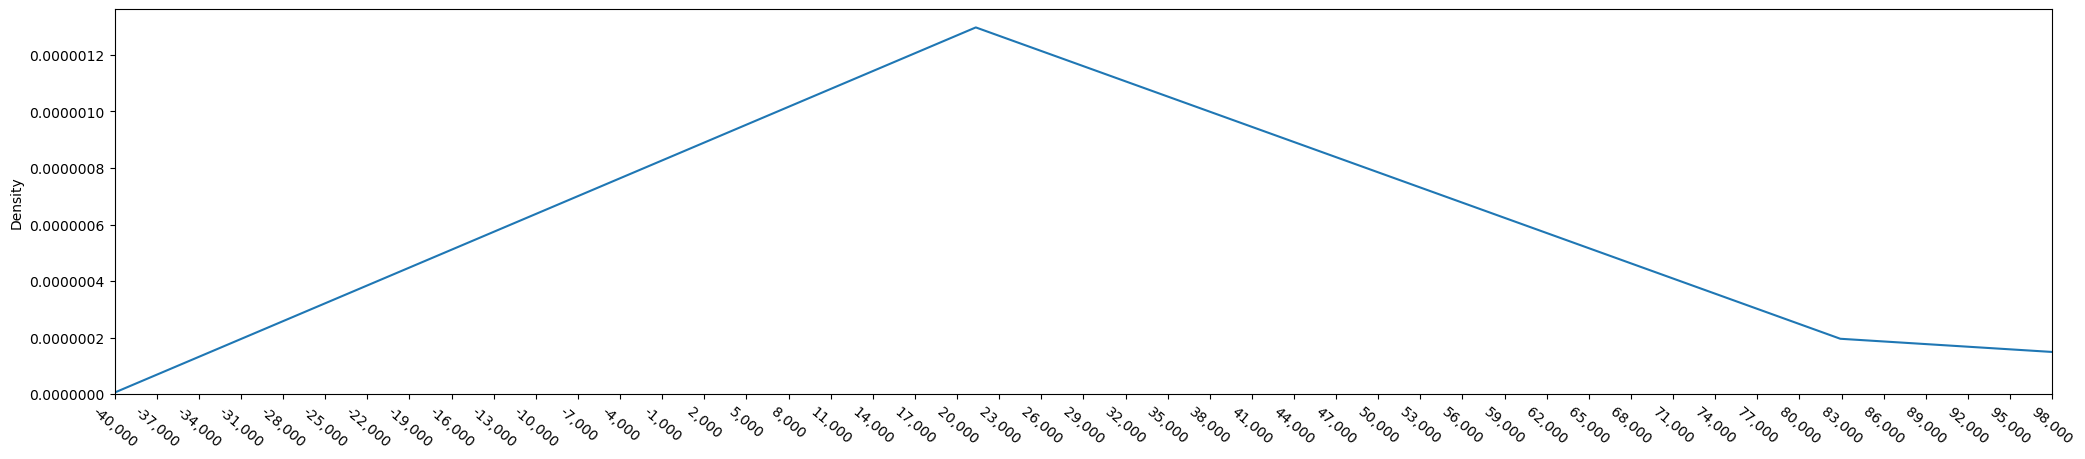

In [30]:
# 비율이 높은 곳 범위 확인
plt.figure(figsize=(25, 5))
ax = plt.gca()

# 과학적 표기법 제거 (e.g. 1e7)
plt.ticklabel_format(axis='x', useOffset=False, style='plain')
plt.ticklabel_format(axis='y', useOffset=False, style='plain')

sns.kdeplot(data=new_data["amount_416A"].values, bw_adjust=0.01)

plt.xlim(new_data["amount_416A"].min(), 10000)
plt.xticks(ticks=range(int(new_data["amount_416A"].min()), 100000, 3000), rotation=-40)
current_values = plt.gca().get_xticks()
ax.set_xticklabels(['{:,}'.format(x) for x in current_values])

plt.show()

In [31]:
# 비율이 높은 데이터 범위 확인
within_range_count = new_data["amount_416A"].between(-40000, 100000).sum()
total_count = len(new_data)

percentage_within_range = (within_range_count / total_count) * 100

print(f"전체 중 {percentage_within_range:.2f}%")

전체 중 9.10%


In [32]:
# 주요 데이터(-4만~10만)의 비율 및 예측률
main_range_data = new_data[(new_data["amount_416A"] >= -40000) & (new_data["amount_416A"] <= 100000)]
MRD_ratio = (len(main_range_data) / len(new_data)) * 100
main_probabillity = (len(main_range_data[main_range_data["target"] == 1]) / len(main_range_data)) * 100

print(f"주요 범위 데이터 비율: {MRD_ratio:.2f}%")
print(f"주요 범위 데이터 예측률: {main_probabillity:.2f}%")

주요 범위 데이터 비율: 9.10%
주요 범위 데이터 예측률: 2.19%


Feature Extraction